In [11]:
import numpy as np 
import pandas as pd 
import plotly as py
import seaborn as sns
import vaex
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import plotly.express as px
import os
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [12]:
dfInicial = vaex.open("../Databases/companies/output_chunk-*.csv")

In [13]:
dfCountriesTotal = vaex.open("../DataSetExtractions/countriesTotal.csv")

In [14]:
print("We have the following data sets:")
print(dfInicial.describe())

We have the following data sets:
          Company name Company URL domain        Year founded Industry  \
data_type       string             string             float64   string   
count          7173427            7173431             3566444  6883423   
NA                   4                  0             3606987   290008   
mean                --                 --  2001.7466683901387       --   
std                 --                 --           20.966276       --   
min                 --                 --              1451.0       --   
max                 --                 --              2103.0       --   

          Size range Locality  Country Linkedin URL Current employee estimate  \
data_type     string   string   string       string                   float64   
count        7173425  4664601  4824220      7173431                   7173423   
NA                 6  2508830  2349211            0                         8   
mean              --       --       --           -

In [26]:
print("And so we built the following table:")
print(dfCountriesTotal.describe())
dfcountriestoseaborn = dfCountriesTotal.to_pandas_df()
enc = OneHotEncoder(handle_unknown='ignore')
print(dfcountriestoseaborn.head(3))
enc.fit(dfcountriestoseaborn)
print(enc.categories_)
print(dfcountriestoseaborn.describe())

And so we built the following table:
          Country            Industry           mean_size          max_size
data_type  string               int64             float64           float64
count         238                 238                 238               238
NA              0                   0                   0                 0
mean           --  20269.831932773108  13.854589827263414  8503.39075630252
std            --       152493.217759           11.056162      29244.955429
min            --                   1                 0.0               0.0
max            --             2278866               112.4          274047.0
          Country  Industry  mean_size  max_size
0     afghanistan       376  12.824468     528.0
1   united states   2278866  17.627809  274047.0
2  united kingdom    511968  12.163858  158363.0
[array(['afghanistan', 'albania', 'algeria', 'american samoa', 'andorra',
       'angola', 'anguilla', 'antigua and barbuda', 'argentina',
       'armenia', 'a

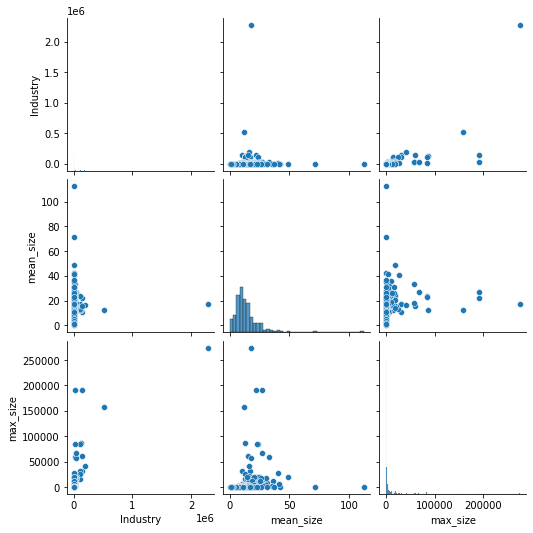

In [27]:
sns.pairplot(data=dfcountriestoseaborn)

In [14]:
pandasDfCountriesTotal =  dfCountriesTotal.to_pandas_df()
print("Here's a sample of the data in the table:")
sample = dfCountriesTotal.head(3) 
countries = sample["Country"].tolist()
industries = sample["Industry"].tolist()
table = vaex.from_arrays(countries = countries, industries = industries)
print(table)

Here's a sample of the data in the table:
  #  countries         industries
  0  afghanistan              376
  1  united states        2278866
  2  united kingdom        511968


In [15]:
print('Countries with most industries, in number:')
maxInd = pandasDfCountriesTotal.nlargest(10, 'Industry')
countries = maxInd["Country"].tolist()
industries = maxInd["Industry"].tolist()
table = vaex.from_arrays(countries = countries, industries = industries)
print(table)

Countries with most industries, in number:
  #  countries         industries
  0  united states        2278866
  1  united kingdom        511968
  2  canada                186621
  3  india                 144444
  4  spain                 143941
  5  netherlands           136809
  6  germany               118575
  7  australia             117133
  8  france                114706
  9  italy                 109818


Wich in turn can be seen in the following graph


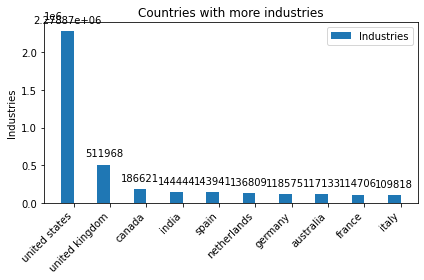

In [16]:
print("Wich in turn can be seen in the following graph")
labels = countries
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects = ax.bar(x - width/2, industries, width, label='Industries')
ax.set_ylabel('Industries')
ax.set_title('Countries with more industries')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
ax.bar_label(rects, padding=6)
fig.tight_layout()

In [ ]:
plt.show()

In [17]:
print('Now, we can see countries by the mean_size of industries, descrescent:')
meanInd = pandasDfCountriesTotal.nlargest(10, 'mean_size')
countries = meanInd["Country"].tolist()
mean_size = meanInd["mean_size"].tolist()
table = vaex.from_arrays(countries = countries, mean_size = mean_size)
print(table)

Now, we can see countries by the mean_size of industries, descrescent:
#    countries       mean_size
0    micronesia      112.4
1    grenada         71.6
2    south korea     48.86855550394798
3    american samoa  42.5
4    liechtenstein   41.66153846153846
...  ...             ...
65   guyana          16.20408163265306
66   lebanon         16.058896852602057
67   zambia          16.05625
68   turkey          15.953974540311174
69   chile           15.906990014265336


Wich can generate the following view:


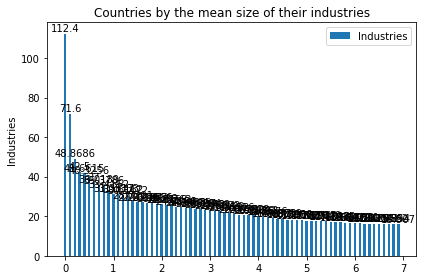

In [18]:
print("Wich can generate the following view:")
labels = countries
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects = ax.bar((x - width/2), mean_size, width, label='Industries')
ax.set_ylabel('Industries')
ax.set_title('Countries by the mean size of their industries')
#ax.set_xticks(x)
#ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
ax.bar_label(rects, padding=0.6)
fig.tight_layout()

In [23]:
plt.show()

In [4]:
print('Now, we can see countries by the max_size of industries, descrescent:')
maxSizeInd = pandasDfCountriesTotal.nlargest(70, 'max_size')
countries = maxSizeInd["Country"].tolist()
max_size = maxSizeInd["max_size"].tolist()
table = vaex.from_arrays(countries = countries, max_size = max_size)
print(table)

Now, we can see countries by the max_size of industries, descrescent:


NameError: name 'pandasDfCountriesTotal' is not defined

In [2]:
print("Wich can generate the following view:")
labels = countries
x = np.arange(len(labels))
width = 0.05
fig, ax = plt.subplots()
rects = ax.bar(x - width/2, max_size, width, label='Max size industries')
ax.set_ylabel('Industries')
ax.set_title('Countries by the max size of their industries')
ax.set_xticks(x)
#ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
ax.bar_label(rects, padding=6)
fig.tight_layout()

Wich can generate the following view:


NameError: name 'countries' is not defined

In [ ]:
plt.show()

In [26]:
DfCountriesTotal = vaex.from_pandas(df=pandasDfCountriesTotal, copy_index=True)
df_countries = DfCountriesTotal["Country"].tolist()
Industries = DfCountriesTotal["Industry"].tolist()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = df_countries,
    locationmode = 'country names',
    z = Industries,
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))

In [ ]:
print('And here we can see the density of companies in the world:')
fig.show()

In [ ]:
print("Here we will see the same map, but removing united states and uk from the list:")

In [ ]:
Industries.remove(max(Industries))
Industries.remove(max(Industries))
Industries.remove(max(Industries))
df_countries.remove("united states")
df_countries.remove("united kingdom")
df_countries.remove("canada")

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = df_countries,
    locationmode = 'country names',
    z = Industries,
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))

In [ ]:
fig.show()